# Previsão dos Preços de Imóveis em Nova Iorque - EUA com Machine Learning

A imobiliária ***Sweet Home Sweet*** tem imóveis em vários bairros de classe média/alta em muitos estados dos Estados Unidos. Com a intenção de melhor gerenciar e nivelar os preços que praticam na cidade de [Nova Iorque, NY, EUA](https://www.google.com/maps/place/Nova+Iorque,+NY,+EUA/@39.8787459,-74.2853328,6.99z/data=!4m5!3m4!1s0x89c24fa5d33f083b:0xc80b8f06e177fe62!8m2!3d40.7127753!4d-74.0059728) a empresa decidiu fazer um levantamento dos preços de imóveis nas vizinhanças para entender como estes preços se comportam e quais fatores mais influenciam na precificação. Para tal a empresa conseguiu reunir dados de 5000 imóveis espalhados por vários estados, mas agora eles precisam analisar e interpretar esses dados.

##### Como um imóvel é precificado?

Dentre os grandes desafios de uma imobiliária está a ação de precificar um imóvel corretamente e de forma justa para todas as partes, isto é, comprador, vendedor e imobiliária. Isso acontece devido o dinamismo deste mercado que exige um acompanhamento constante das tendências e perspectivas do setor por parte dos corretores e das imobiliárias.

Existem alguns fatores que são de grande importância e que um corretor deve observar ao realizar a devida avaliação do imóvel em questão. Alguns dos fatores que influenciam diretamente no valor do imóvel são e estão relacionados com:

* localização e vizinhança;
* tipo de construção;
* infraestrutura de tecnologia e lazer;
* proximidade com lojas e serviços;
* segurança;
* estrutura do terreno;
* idade da construção;
* acabamento;
* estado de conservação.

A imobiliária ***Sweet Home Sweet*** coletou os seguintes dados:
* **Avg. Area Income**: renda média de área;
* **Avg. Area House Age**: idade média das casas na área;
* **Avg. Area Number of Rooms**: número médio de cômodos nas casas da área;
* **Avg. Area Number of Bedrooms**: número médio de quartos nas casas da área;
* **Area Population**: população da área;
* **Price**: preço;
* **Address**: endereço


---

### DISCLAIMER: o dataset utilizado é fictício, qualquer similaridade com a vida real, tanto em nomes quanto em valores, é apenas mera coincidência!

O dataset pode ser encontrado no [Kaggle](https://www.kaggle.com/aariyan101/usa-housingcsv), também há uma cópia na pasta [datasets do meu github](https://github.com/matemagico/data_science/tree/main/datasets).

---

In [1]:
#Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#para não precisar usar o plt.show()
%matplotlib inline

In [2]:
#Definindo estilos de gráfico e cor
sns.set_style('whitegrid')
sns.set_palette('bone')

In [3]:
#Lendo o arquivo de dados
houses = pd.read_csv('USA_Housing.csv')

## 1. Análise Exploratória dos Dados

Inicialmente serão vistas as informações principais que estão contidas no dataset e alguns gráficos para ver qual tipo de análise pode ser feita.

In [4]:
#Exibindo as 5 primeiras linhas do dataset
houses.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# Conferindo quais tipos de dados existem e se há dados ausentes
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
#Exibindo algumas informações para ter uma noção básica de como os dados estão distribuídos
houses.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


Como não há nenhum tipo de dado a ser tradado o próximo passo é gerar gráficos para saber qual análise utilizar.

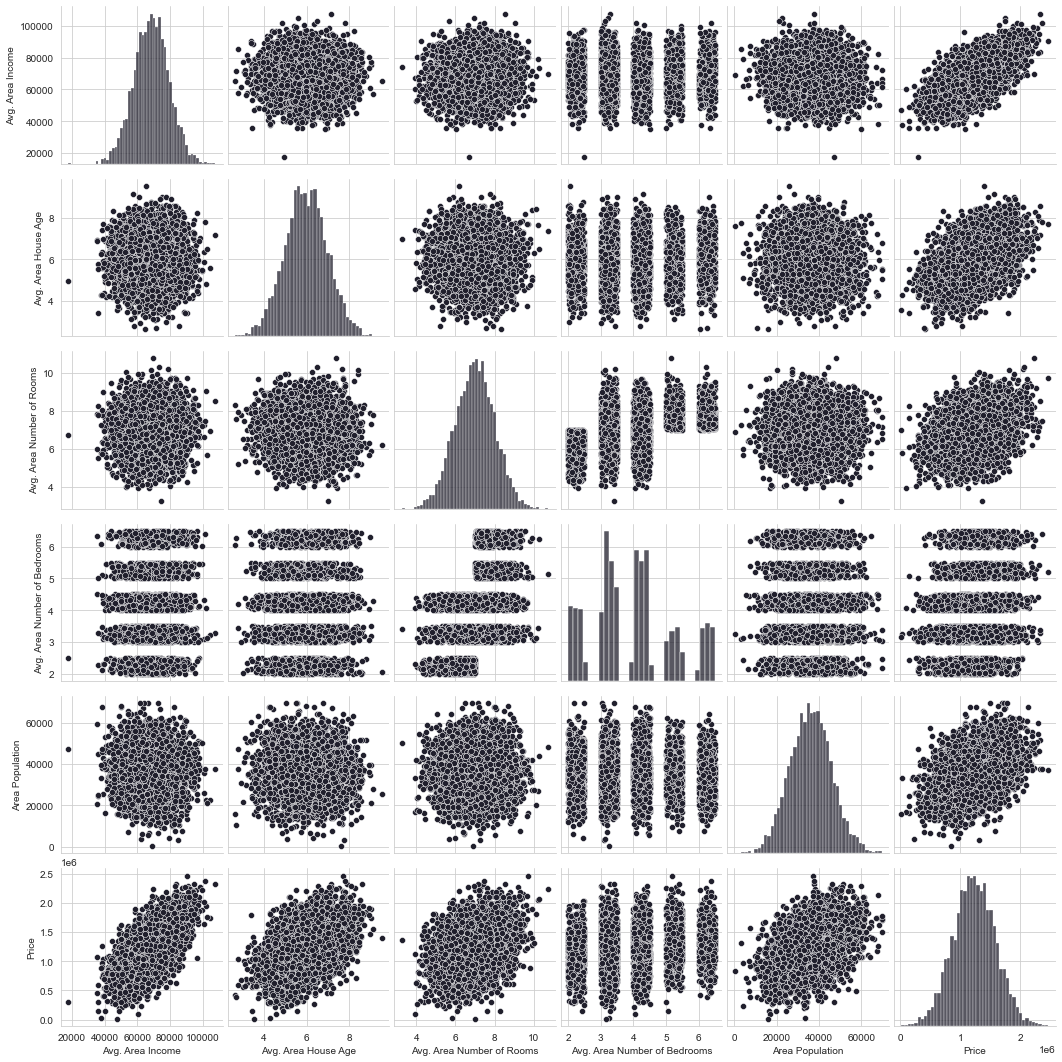

In [7]:
#Plotando gráficos de todos os pares de variáveis quantitativas no dataset
sns.pairplot(houses)

<AxesSubplot:>

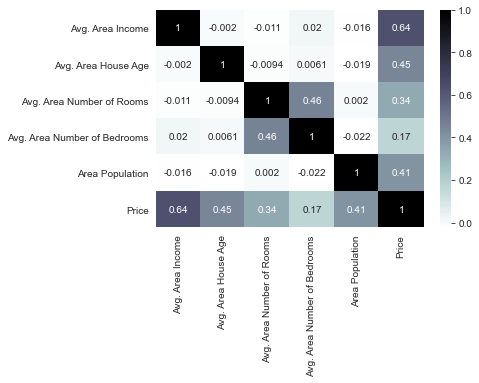

In [8]:
#Criando um heatmap sobre a correlação das colunas de variáveis quantitativas
sns.heatmap(houses.corr(), annot=True, cmap='bone_r')

Fazendo uma análise superficial nos gráficos gerados percebe-se que há um correlação entre o preço e as demais variáveis, principalmente com a variável **Avg. Area Income** (renda média da área). O gráfico de heatmap foi construído sobre uma correlação linear, comprovando o que temos nos gráficos anteriores. A partir daqui será construído um modelo de Machine Learning baseado em Regressão Linear.

## 2. Construção do Modelo de Machine Learning

Nesta etapa será visualizado os nomes de todas as colunas, depois serão separadas em duas variáveis (uma contendo as colunas explicativas e outra contendo a coluna resposta). Após esta divisão o método de fatiamento dividirá os dados entre dados de treino e dados de teste, para ambas as variáveis. Um outro método de regressão linear será utilizado para criar e treinar o modelo, na sequência os coeficientes serão expostos e a precisão do modelo será analisada.

In [9]:
#Visualizando as colunas
houses.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
#Variável com as colunas explicativas
X = houses[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]

#Variável com a coluna a ser predita
y = houses['Price']

A coluna **Address** não será utilizada pois contém apenas variáveis categóricas que não agregam e não podem ser utilizadas neste modelo de machine learning com regressão linear.

In [11]:
#Importando o método de fatiamento dos dados
from sklearn.model_selection import train_test_split

In [12]:
#Criando as variáveis que receberão cada parte do dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [13]:
#Importando o método de regressão linear para condicionar o machine learning
from sklearn.linear_model import LinearRegression

In [14]:
#Variável que recebe o método
lm = LinearRegression()

In [15]:
#Treinando o modelo
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
#Criando um dataframe para melhor visualizar os coeficientes
coefs = pd.DataFrame(lm.coef_, X.columns, columns=['Coeficientes'])
coefs

,Coeficientes
Avg. Area Income,21.593642
Avg. Area House Age,166596.875512
Avg. Area Number of Rooms,119572.069326
Avg. Area Number of Bedrooms,2117.851877
Area Population,15.253142


O que estes coeficientes informam? Eles dizem que sempre que uma variável recebe mais um de valor o preço sobe no valor do coeficiente, desde que as outras variáveis se mantenham constantes. Por exemplo, se a **Avg. Area Income** (renda média da área) sobe em 1 o valor do imóvel sobe em 21.59 dólares.

In [17]:
#Variável com os preços previstos pelo modelo
preds = lm.predict(X_test)

## 2.1 Avaliando o Modelo

Text(0, 0.5, 'Predições')

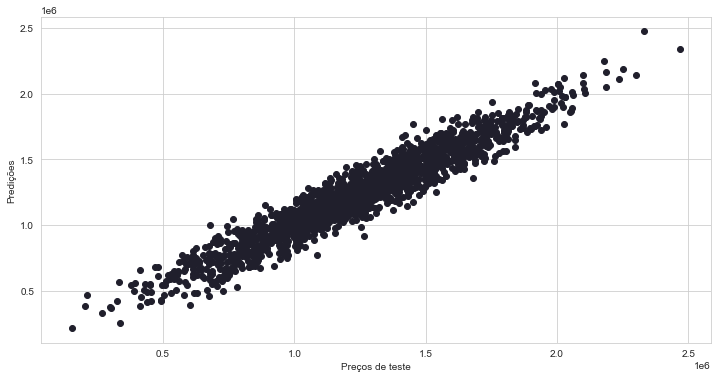

In [18]:
#Gráfico para comparar as predições com os resultados de teste
plt.figure(figsize=(12, 6))
plt.scatter(y_test, preds)
plt.xlabel('Preços de teste')
plt.ylabel('Predições')

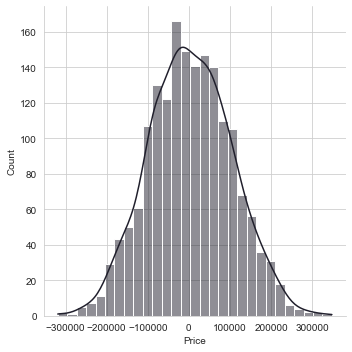

In [19]:
#Gráfico de curva normal para ver como os erros se comportam
sns.displot((y_test-preds), kde=True)

In [20]:
#Importando o método metrics
from sklearn import metrics

In [21]:
#Calculando alguns tipos de erro para avaliar o modelo
print('MAE: ', metrics.mean_absolute_error(y_test, preds),
     '\nMSE: ', metrics.mean_squared_error(y_test, preds),
     '\nRMSE: ',np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE:  80841.22896359225 
MSE:  10087126221.66856 
RMSE:  100434.68634724041


Como o primeiro gráfico se aproxima de uma reta definida e o segundo gráfico de distribuição se aproxima de uma curva normal pode-se dizer que o modelo está bem treinado e ajustado.

## 3. Conclusão

Como ficou claro no gráfico heatmap que indica as correlações das colunas a única coluna que tem alguma relação forte com a coluna **Price** (preço) é a coluna **Avg. Area Income** (renda média da área), as demais colunas apresentam uma relação fraca. Independentemente da correlação entre as colunas o modelo está bem treinado e apresenta um resultado coerente, a regressão linear se mostrou uma boa ferramenta para este caso.

Considerando as informações a empresa deve focar, principalmente, a renda média das pessoas em um determinado bairro para precificar seus imóveis.